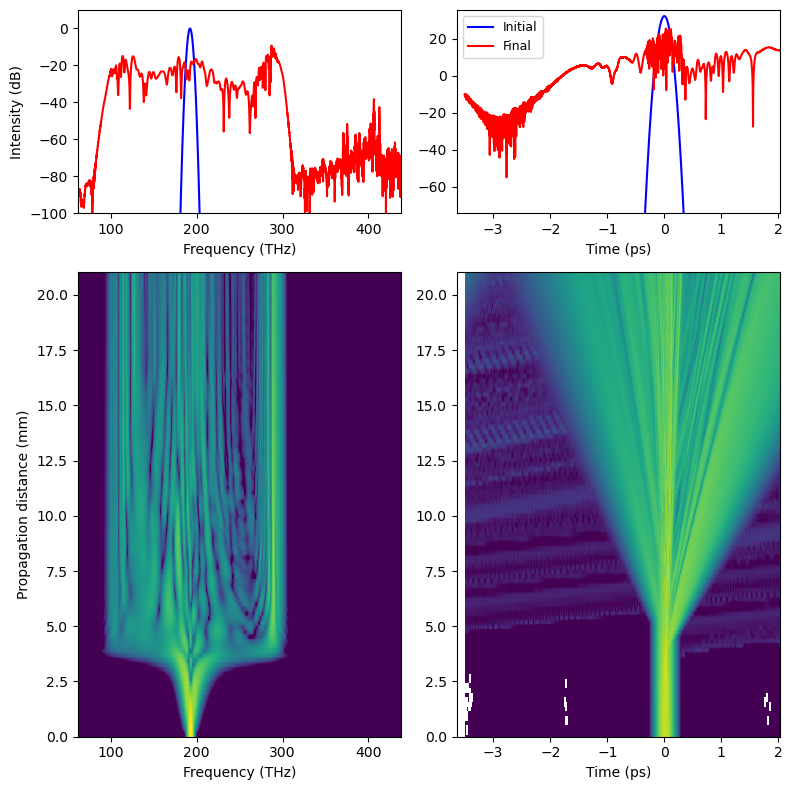

In [3]:
"""Example of NLSE with length-varying fiber properties."""

import laserfun as lf

FWHM = 0.20    # pulse duration (ps)
pulseWL = 1560  # pulse central wavelength (nm)
EPP = 200e-12    # Energy per pulse (J)
GDD = 0.0       # Group delay dispersion (ps^2)
TOD = 0.0       # Third order dispersion (ps^3)

Window = 7.0    # simulation window (ps)
Steps = 100     # simulation steps
Points = 2**12  # simulation points
rtol = 1e-4     # relative error for NLSE integrator
atol = 1e-4     # absolute error

# initial properties (at the start of the fiber)
beta2i = -120   # (ps^2/km)
beta3i = 0.00   # (ps^3/km)
beta4i = 0.005  # (ps^4/km)
Gammai = 1000   # nonlinearity (1/(W km))
Alphai = 0      # loss (dB/cm)

# final properties (at the end of the fiber)
beta2f = -120   # (ps^2/km)
beta3f = 0.00   # (ps^3/km)
beta4f = 0.005  # (ps^4/km)
Gammaf = 2000   # nonlinearity (1/(W km))
Alphaf = 2      # loss (dB/cm)

Length = 21.05      # length in mm

fibWL = pulseWL  # Center WL of fiber (nm)

Raman = True     # Enable Raman effect?
Steep = True     # Enable self steepening?

# create the pulse
pulse = lf.Pulse(pulse_type='gaussian', fwhm_ps=FWHM, center_wavelength_nm=pulseWL,
                 time_window_ps=Window, GDD=GDD, TOD=TOD, npts=Points, epp=EPP)

# create the fiber!
fiber1 = lf.Fiber(Length * 1e-3, center_wl_nm=pulseWL)


def dispersion_function(z):
    """Set the dispersion."""
    frac = z/(Length*1e-3)
    beta2 = (1-frac) * beta2i + frac * beta2f
    beta3 = (1-frac) * beta3i + frac * beta3f
    beta4 = (1-frac) * beta4i + frac * beta4f
    return (beta2*1e-3, beta3*1e-3, beta4*1e-3)


def gamma_function(z):
    """Set the gamma."""
    frac = z/(Length*1e-3)
    gamma = 1e-3*((1-frac)*Gammai + frac*Gammaf)
    return gamma


def alpha_function(z):
    """Set the loss."""
    frac = z/(Length*1e-3)
    alpha = ((1-frac)*Alphai + frac*Alphaf)
    return alpha*100


fiber1.set_dispersion_function(dispersion_function)
fiber1.set_gamma_function(gamma_function)
fiber1.set_alpha_function(alpha_function)

# propagate the pulse using the NLSE
results = lf.NLSE(pulse, fiber1, raman=Raman, shock=Steep, nsaves=Steps,
                  atol=atol, rtol=rtol, integrator='lsoda', reload_fiber=True,
                  print_status=False)

if __name__ == '__main__':
    results.plot()